# Linear_Regression

## 手撕（一元情况）

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


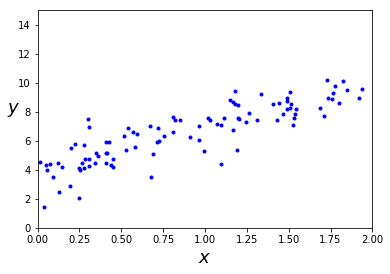

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]) # 横纵轴范围值
# save_fig("generated_data_plot")
plt.show()

In [5]:
X_b = np.c_[np.ones((100,1)), X] # 扩展X矩阵为新的X，因为w加入了偏置项，所以X需扩展1

In [6]:
X_b.shape

(100, 2)

由于 $X^TX$ 是满秩矩阵，所以可以直接求解$$\hat{\omega}^*=(X^TX)^{-1}X^TY$$

In [7]:
omega_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #求逆矩阵

In [8]:
omega_best

array([[3.87235195],
       [3.02398606]])

In [9]:
# 两点确定一条直线
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 扩展矩阵，添加偏置项
y_predict = X_new_b.dot(omega_best)
y_predict

array([[3.87235195],
       [9.92032406]])

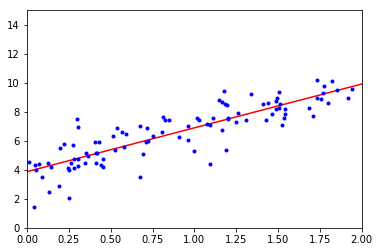

In [10]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

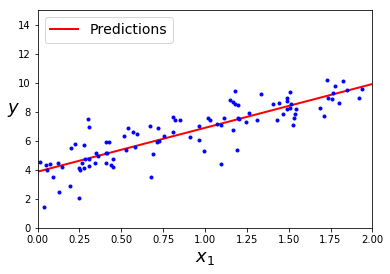

In [11]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
#save_fig("linear_model_predictions_plot")
plt.show()

## sklearn实现

In [13]:
from sklearn import linear_model

In [14]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.87235195]), array([[3.02398606]]))

In [15]:
lin_reg.predict(X_new)

array([[3.87235195],
       [9.92032406]])

`LinearRegression()` 是基于`scipy.linalg.lstsq()`，即（least squares）最小二乘法，可以在numpy中直接调用它:

>原理：如果 $X$ 是方的并且是满秩的，那么 $\omega$ 是方程的“exact” 解。
>otherwise，$\omega$最小化欧几里得2-norm $\lVert Y-\omega X\rVert^2_2$ 如果有多个最小化解，则具有最小 2 范数的解 $\lVert\omega\rVert^2_F$ 被输出。

In [16]:
omega_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
omega_best_svd

array([[3.87235195],
       [3.02398606]])

`np.linalg.pinv`可以计算伪逆

In [18]:
np.linalg.pinv(X_b).dot(y)

array([[3.87235195],
       [3.02398606]])

## 手撕（多元情况）